In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
import quantum_imaging as qi
import quantum_drawer as qd
from IPython.display import Image
import numpy as np
%matplotlib inline

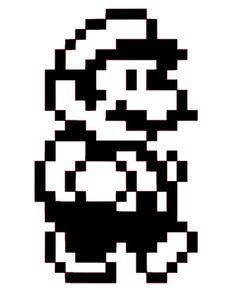

In [2]:
Image('mario.jpg')

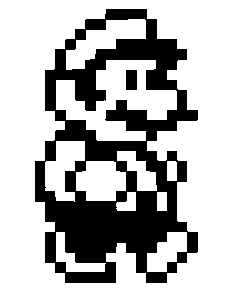

In [6]:
image_mario = qi.convert_to_bw("mario.jpg")
qi.image_from_array(image_mario)

In [34]:
image_mario.shape

(295, 236)

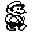

In [35]:
resized_image_mario = qi.resize_array(image_mario, size=(32, 32))
qi.image_from_array(resized_image_mario)

In [36]:
array_binary_mario = qi.binary_encode(resized_image_mario)
qi.save_bin_array_to_csv('mario_test.csv', array_binary_mario)

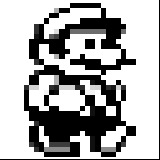

In [37]:
scaled_image = qi.scale_binary_image(resized_image_mario, 5)
qi.image_from_array(scaled_image)

In [38]:
# Simulator
qasm_sim = Aer.get_backend("aer_simulator")

# Number of circuit qubits
n_qubits = 7

In [39]:
binary_data_array = qi.load_bin_array_from_csv('mario_test.csv')

cols_items = binary_data_array.shape[1]
splitting = qd.splitting_chunks(cols_items, n_qubits)

In [40]:
rework_image = qd.rebuild_image_quantum_enhance_onerun(binary_data_array, splitting, n_qubits, qasm_sim)
rework_image.shape

(32, 32)

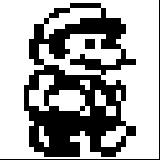

In [41]:
rebuild_data = qi.rebuild_binary_array(rework_image)
#qi.image_from_array(rebuild_data)
scaled_image = qi.scale_binary_image(rebuild_data, 5)
final_image = qi.image_from_array(scaled_image)
final_image

In [42]:
qi.save_image_to_jpg(final_image, 'mario_test.png')

# REAL QUANTUM COMPUTER

In [43]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
import qiskit.tools.jupyter

In [44]:
if not IBMQ.active_account():
    IBMQ.load_account()

all_providers = IBMQ.providers()

provider = all_providers[1] #IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider

<AccountProvider for IBMQ(hub='ibm-q-csic', group='internal', project='main')>

In [45]:
%qiskit_backend_overview

In [46]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= n_qubits and b.status().operational and not b.configuration().simulator))
backend

<IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-csic', group='internal', project='main')>

In [47]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [48]:
binary_data_array = qi.load_bin_array_from_csv('mario_test.csv')

cols_items = binary_data_array.shape[1]
splitting = qd.splitting_chunks(cols_items, n_qubits)

rework_image = qd.rebuild_image_quantum_enhance_onerun(binary_data_array, splitting, n_qubits, backend, num_shots = 1)
rework_image.shape

(32, 32)

In [49]:
%qiskit_disable_job_watcher

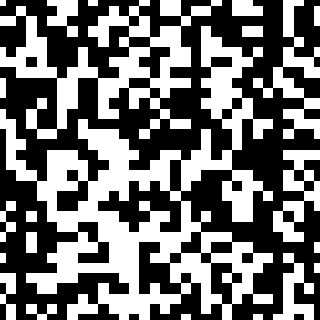

In [50]:
rebuild_data = qi.rebuild_binary_array(rework_image)
#qi.image_from_array(rebuild_data)
scaled_image = qi.scale_binary_image(rebuild_data, 10)
qi.image_from_array(scaled_image)

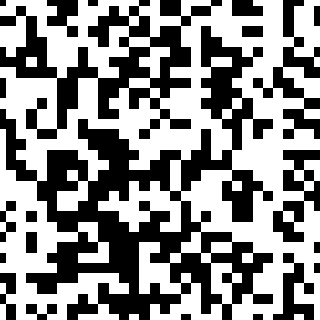

In [51]:
inverted = qi.invert_data(scaled_image)
final_image = qi.image_from_array(inverted)
final_image

In [52]:
qi.save_image_to_jpg(final_image, 'mario_test_qc.png')

In [53]:
array_binary_ibmq = qi.binary_encode(scaled_image)
qi.save_bin_array_to_csv('mario_test_ibmq.csv', array_binary_ibmq)

In [54]:
import qiskit.tools.jupyter
%qiskit_version_table